수강생분의 이름과 학번을 입력해주세요.

In [72]:
print("이혜림", "20211924")

이혜림 20211924


구글 드라이브 연결

In [73]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


작업폴더 경로 설정

In [74]:
workspace_path = '/gdrive/My Drive/Colab Notebooks/AI/AI_week2'  # 과제 파일 업로드한 경로 반영
# 작업폴더 경로 참고: 작업폴더 하위에 data 폴더 생성하여 CSV 파일 읽기/쓰기 수행
# A = os.path.join(workspace_path, 'data/winequality-red.csv')
# A = '/gdrive/My Drive/Colab Notebooks/data/winequality-red.csv'

# 작업폴더 경로 수정하였습니다

파이썬 패키지 불러오기

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols, glm

# 와인 품질 예측하기

*   목표: 와인의 속성을 분석하여 품질 등급 예측
*   레드 와인과 화이트 와인 그룹의 품질에 대한 t-검증 수행
*   와인 속성을 독립 변수로, 품질 등급을 종속 변수로 선형 회귀 분석을 수행

### 데이터 불러오기

In [76]:
red_df = pd.read_csv(os.path.join(workspace_path, 'data/winequality-red.csv'), sep=';', header=0, engine='python')
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [77]:
white_df = pd.read_csv(os.path.join(workspace_path, 'data/winequality-white.csv'), sep=';', header=0, engine='python')
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [78]:
red_df.to_csv(os.path.join(workspace_path, 'data/winequality-red2.csv'), index=False)  # CSV 파일 출력
white_df.to_csv(os.path.join(workspace_path, 'data/winequality-white2.csv'), index=False)

### 데이터 병합: 레드 와인과 화이트 와인 파일 합치기

In [79]:
red_df.insert(0, column='type', value='red')  # 0번째 인덱스에 'type' 속성 추가 ('red'로 채우기)
red_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [80]:
white_df.insert(0, column='type', value='white')  # 0번째 인덱스에 'type' 속성 추가 ('white'로 채우기)
white_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [81]:
white_df.shape

(4898, 13)

In [82]:
wine = pd.concat([red_df, white_df])  # red, white 데이터 병합
wine.shape

(6497, 13)

In [83]:
wine.to_csv(os.path.join(workspace_path, 'data/wine.csv'), index=False)

In [84]:
wine.head()  # 앞부분 데이터 샘플 보기

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [85]:
wine.tail()  # 뒷부분 데이터 샘플 보기

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,white,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


### 데이터 탐색

In [86]:
wine.info()  # 데이터 기본 정보 확인하기

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [87]:
wine.columns = wine.columns.str.replace(' ', '_')  # 속성(column) 이름 공란을 '_'로 변경
wine.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [88]:
sorted(wine.quality.unique())  # 'quality' 속성값 중에서 유일한 값만 출력

[3, 4, 5, 6, 7, 8, 9]

In [89]:
wine.quality.value_counts()  # 'quality' 속성값 빈도수 출력

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [90]:
wine['quality'].value_counts()  # 'quality' 속성값 빈도수 출력

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

### 데이터 모델링

#### describe() 함수로 그룹 비교

In [91]:
wine.groupby('type')['quality'].describe()  # 'type'으로 그룹 나누기 -> 그룹 'quality' 통계치 출력

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [92]:
red_wine_quality = wine.loc[wine['type'] == 'red', 'quality']  # 'type'이 'red'인 샘플의 'quality' 속성값 추출
red_wine_quality

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [93]:
white_wine_quality = wine.loc[wine['type'] == 'white', 'quality']  # 'type'이 'white'인 샘플의 'quality' 속성값 추출
white_wine_quality

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

#### t-검정과 회귀 분석으로 그룹 비교

In [94]:
stats.ttest_ind(red_wine_quality, white_wine_quality, equal_var=False)
# tvalue: 표본평균사이의 차이 / 표준오차
# pvalue <= 유의수준(통상 0.05), 두 모집단의 평균 간에 유의미한 차이 존재 (귀무가설 기각)

TtestResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24, df=2950.750452166697)

In [95]:
Rformula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol'

In [96]:
wine_train = pd.concat([red_df[:-5], white_df[:-5]])  # 학습용 red, white 데이터 병합
wine_train.columns = wine_train.columns.str.replace(' ', '_')  # 속성(column) 이름 공란을 '_'로 변경
wine_train.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [97]:
regression_result = ols(Rformula, data=wine_train).fit()  # 선형 회귀 모델 학습(fitting)

In [98]:
regression_result.summary()  # 선형 회귀 분석 통계값 출력

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     242.7
Date:                Thu, 14 Sep 2023   Prob (F-statistic):               0.00
Time:                        06:52:20   Log-Likelihood:                -7207.7
No. Observations:                6487   AIC:                         1.444e+04
Df Residuals:                    6475   BIC:                         1.452e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.8997     11.912      4.693      0.000      32.548      79.251
fixed_acidity            0.0677      0.016      4.338      0.000       0.037       0.098
volatile_acidity        -1.3256      0.077    -17.118      0.000      -1.477      -1.174
citric_acid             -0.1086      0.080     -1.363      0.173      -0.265       0.048
residual_sugar           0.0436      0.005      8.452      0.000       0.034       0.054
chlorides               -0.4825      0.333     -1.449      0.147      -1.135       0.170
free_sulfur_dioxide      0.0060      0.001      7.980      0.000       0.005       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.993      0.000      -0.003      -0.002
density                -55.1111     12.156     -4.534      0.000     -78.941     -31.281
pH                       0.4417      0.090      4.882      0.000       0.264       0.619
sulphates                0.7690      0.076     10.093      0.000       0.620       0.918
alcohol                  0.2667      0.017     15.926      0.000       0.234       0.300
==============================================================================
Omnibus:                      143.571   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.253
Skew:                          -0.006   Prob(JB):                     6.41e-71
Kurtosis:                       4.094   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 회귀 분석 모델로 새로운 샘플의 품질 등급 예측

In [99]:
sample1 = wine[wine.columns.difference(['quality', 'type'])]  # 'quality', 'type' 속성 제외한 나머지 독립 변수 추출
sample1 = sample1[-5:][:]  # 검증용 마지막 5개 샘플만 추출
sample1

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
4893,11.2,0.039,0.29,0.99114,6.2,24.0,3.27,1.6,0.50,92.0,0.21
4894,9.6,0.047,0.36,0.99490,6.6,57.0,3.15,8.0,0.46,168.0,0.32
4895,9.4,0.041,0.19,0.99254,6.5,30.0,2.99,1.2,0.46,111.0,0.24
4896,12.8,0.022,0.30,0.98869,5.5,20.0,3.34,1.1,0.38,110.0,0.29
4897,11.8,0.020,0.38,0.98941,6.0,22.0,3.26,0.8,0.32,98.0,0.21


In [100]:
sample1_predict = regression_result.predict(sample1)  # 학습한 회귀 분석 모델로 sample1의 'quality' 예측

In [101]:
sample1_predict  # 예측한 'quality' 확인

4893    6.168888
4894    5.608973
4895    5.418848
4896    6.432341
4897    6.205433
dtype: float64

In [102]:
wine[-5:][['quality', 'type']]  # 정답 'quality' 확인

,quality,type
4893,6,white
4894,5,white
4895,6,white
4896,7,white
4897,6,white


In [103]:
data = {'fixed_acidity': [8.5, 8.1], 'volatile_acidity': [0.8, 0.5],
        'citric_acid': [0.3, 0.4], 'residual_sugar': [6.1, 5.8],
        'chlorides': [0.055, 0.04], 'free_sulfur_dioxide': [30.0, 31.0],
        'total_sulfur_dioxide': [98.0, 99], 'density': [0.996, 0.91],
        'pH': [3.25, 3.01], 'sulphates': [0.4, 0.35], 'alcohol': [9.0, 0.88]
        }  # 임의의 데이터 샘플 sample2 생성

In [104]:
sample2 = pd.DataFrame(data, columns=sample1.columns)
sample2

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.00,0.055,0.3,0.996,8.5,30.0,3.25,6.1,0.40,98.0,0.8
1,0.88,0.040,0.4,0.910,8.1,31.0,3.01,5.8,0.35,99.0,0.5


In [105]:
sample2_predict = regression_result.predict(sample2)  # 학습한 회귀 분석 모델로 sample2의 'quality' 예측
sample2_predict

0    4.810734
1    7.597334
dtype: float64

### 결과 시각화

#### distplot(히스토그램+커널밀도추정) 그리기

<ipython-input-106-819c936443c2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(red_wine_quality, kde=True, color='red', label='red wine')  # red wine distplot 객체 생성
<ipython-input-106-819c936443c2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(white_wine_quality, kde=True, label='white win

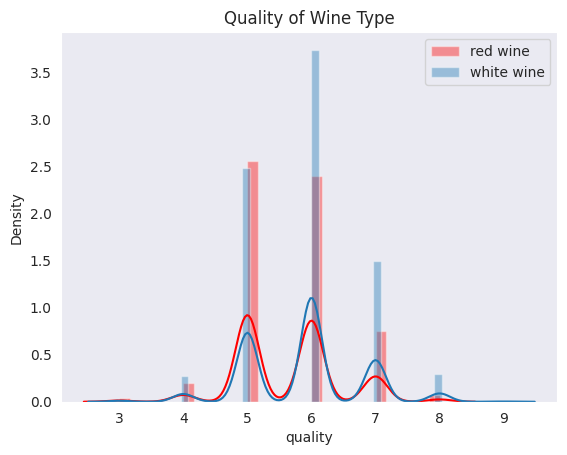

In [106]:
sns.set_style('dark')
sns.distplot(red_wine_quality, kde=True, color='red', label='red wine')  # red wine distplot 객체 생성
sns.distplot(white_wine_quality, kde=True, label='white wine')  # white wine distplot 객체 생성
plt.title('Quality of Wine Type')  # 차트 제목 설정
plt.legend()  # 차트 범례 설정
plt.show()  # 차트 보이기

# 타이타닉호 생존율 분석하기

*   목표: 타이타닉호 승객 변수를 분석하여 생존 유무 예측
*   생존과 가장 상관관계가 높은 변수는 무엇인지 분석
*   상관관계 분석을 위해 피어슨 상관 계수를 사용
*   변수 간의 상관관계를 시각화하여 분석

### 데이터 준비

In [107]:
titanic = sns.load_dataset('titanic')  # seaborn 패키지의 예제 데이터셋 'titanic' 불러오기
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [108]:
titanic.isnull().sum()  # 속성 별로 null값 개수 세기

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [109]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())  # null값을 중간값(median)으로 채우기

### 데이터 탐색

In [110]:
titanic.info()  # 데이터 기본 정보 탐색

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Text(0.5, 1.0, 'Survived (Female)')

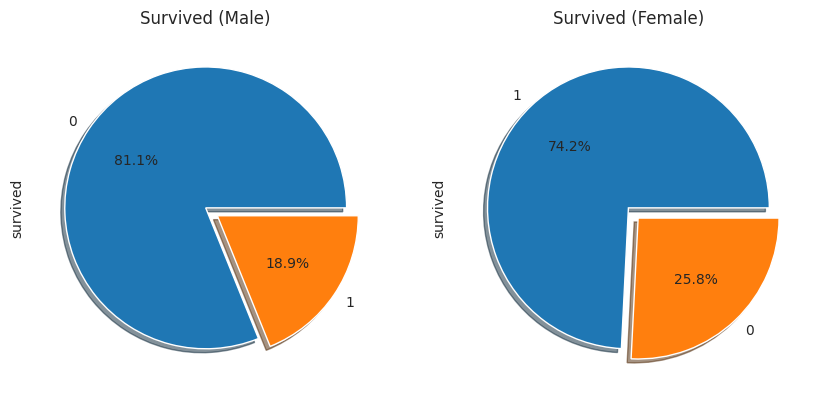

In [111]:
# 남성(male) 생존율 pie 차트 (18.9% = 남성생존자 / 남성수)
f, ax = plt.subplots(1, 2, figsize=(10, 5))
titanic['survived'][titanic['sex'] == 'male'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
# 여성(female) 생존율 pie 차트 (25.8% = 여성생존자 / 여성수)
titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[1], shadow=True)
ax[0].set_title('Survived (Male)')
ax[1].set_title('Survived (Female)')

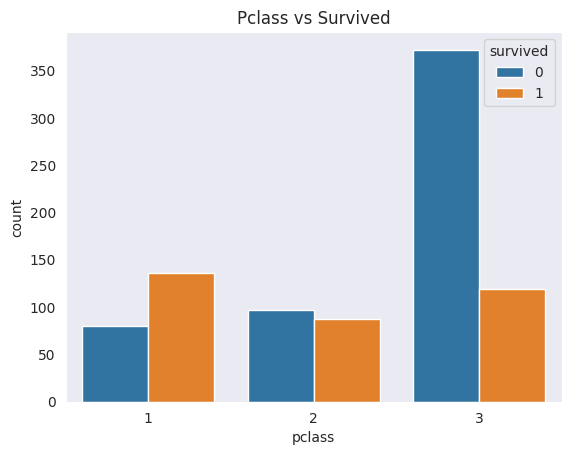

In [112]:
# sns.countplot('pclass', hue='survived', data=titanic)  # 빈도수 막대그래프

# got multiple values for argument error가 발생하여, 변수이름을 명시하는 방법으로 코드를 수정하였습니다
sns.countplot(x='pclass', hue='survived', data=titanic)
plt.title('Pclass vs Survived')
plt.show()

### 데이터 모델링

In [113]:
titanic_corr = titanic.corr(method='pearson')  # 피어슨 상관 계수를 적용하여 계산
titanic_corr

<ipython-input-113-6c9f038818f2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_corr = titanic.corr(method='pearson')  # 피어슨 상관 계수를 적용하여 계산


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [114]:
titanic_corr.to_csv(os.path.join(workspace_path, 'data/titanic_corr.csv'), index=False)  # 상관계수 CSV 파일 출력

In [115]:
titanic['survived'].corr(titanic['adult_male'])  # 'survived'와 'adult_male' 변수 간의 상관계수

-0.5570800422053257

In [116]:
titanic['survived'].corr(titanic['fare'])  # 'survived'와 'fare' 변수 간의 상관계수

0.2573065223849625

### 결과 시각화

In [117]:
titanic["adult_male"] = titanic["adult_male"].astype(int)
titanic["alone"] = titanic["alone"].astype(int)

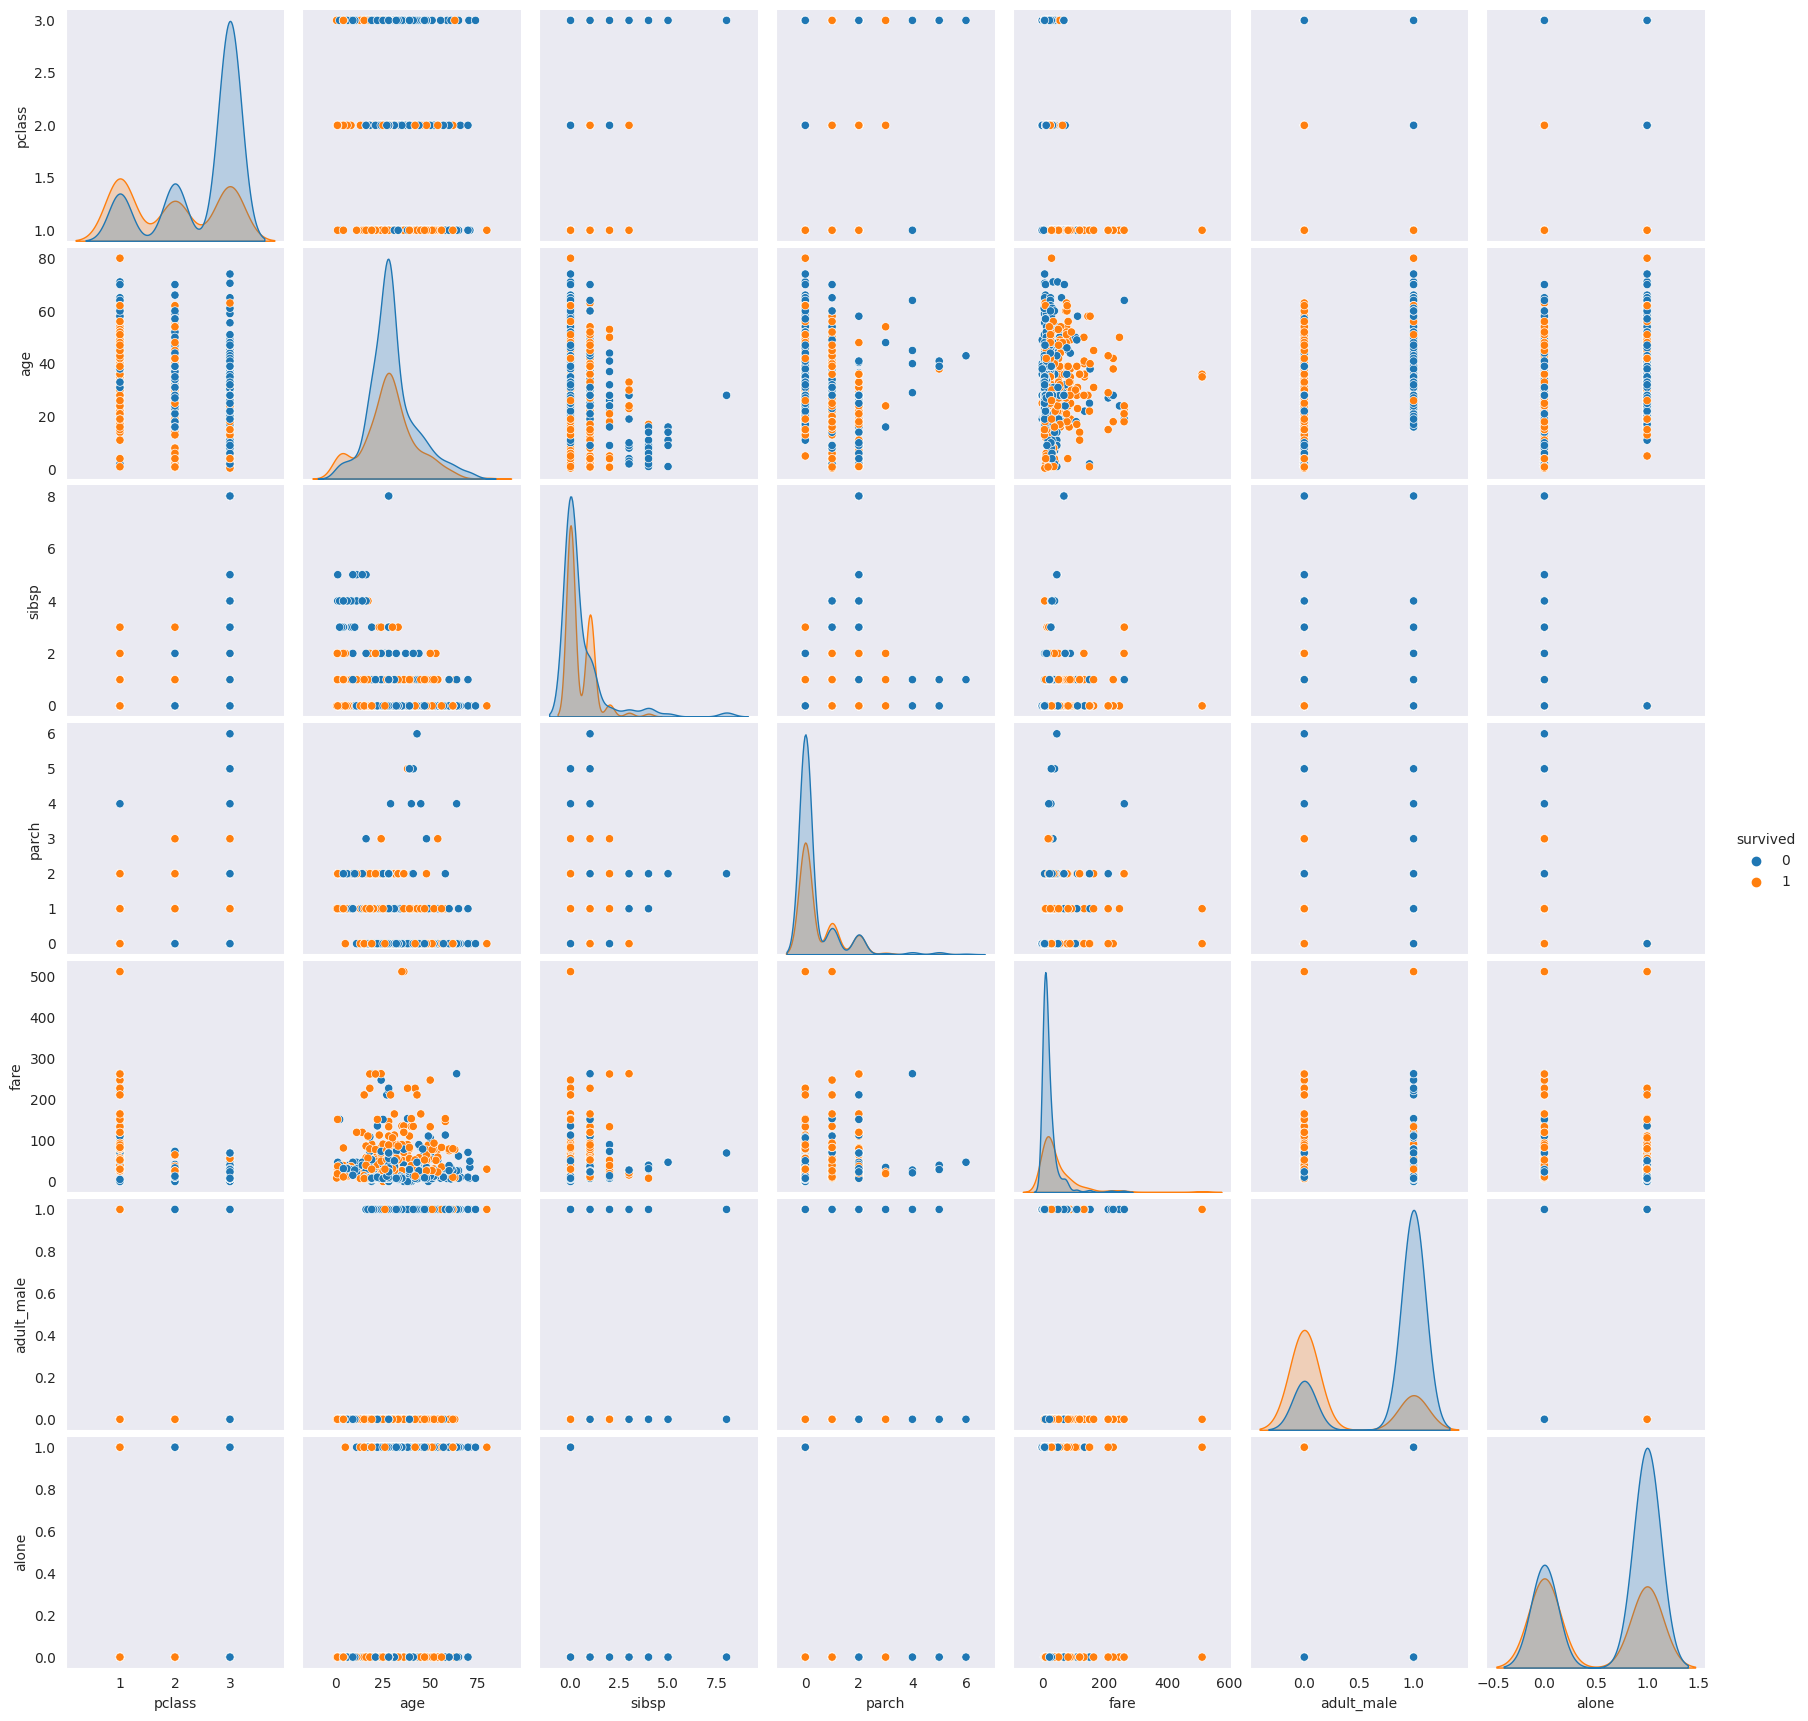

In [118]:
sns.pairplot(titanic, hue='survived')  # 산점도로 상관 분석 시각화
plt.show()

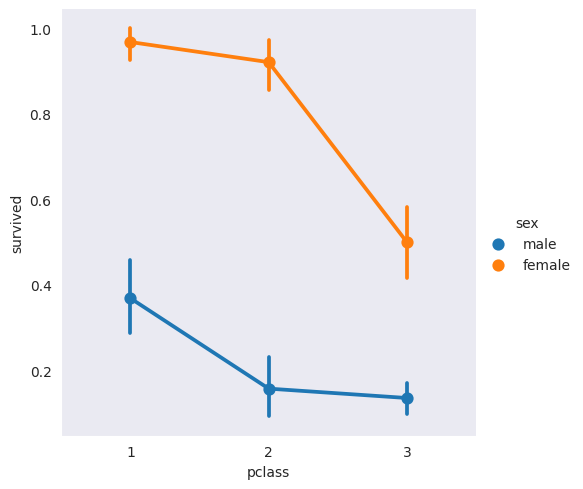

In [119]:
sns.catplot(x='pclass', y='survived', hue='sex', data=titanic, kind='point')  # 성별 그룹 별로 생존자 객실 등급과 생존 상관관계 시각화
plt.show()

나이 정보 정제

In [120]:
def category_age(x):
    result = 0
    if x < 10:
        result = 0
    elif x < 20:
        result = 1
    elif x < 30:
        result = 2
    elif x < 40:
        result = 3
    elif x < 50:
        result = 4
    elif x < 60:
        result = 5
    elif x < 70:
        result = 6
    else:
        result = 7
    return result


In [121]:
titanic['age2'] = titanic['age'].apply(category_age)
titanic['sex'] = titanic['sex'].map({'male': 1, 'female': 0})  # 성별 정보 정제
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1  # 가족정보 정제
titanic.to_csv(os.path.join(workspace_path, 'data/titanic3.csv'), index=False)  # 현재 데이터 CSV 파일 출력
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2,family
0,0,3,1,22.0,1,0,7.2500,S,Third,man,1,NaN,Southampton,no,0,2,2
1,1,1,0,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,0,3,2
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,0,NaN,Southampton,yes,1,2,1
3,1,1,0,35.0,1,0,53.1000,S,First,woman,0,C,Southampton,yes,0,3,2
4,0,3,1,35.0,0,0,8.0500,S,Third,man,1,NaN,Southampton,no,1,3,1


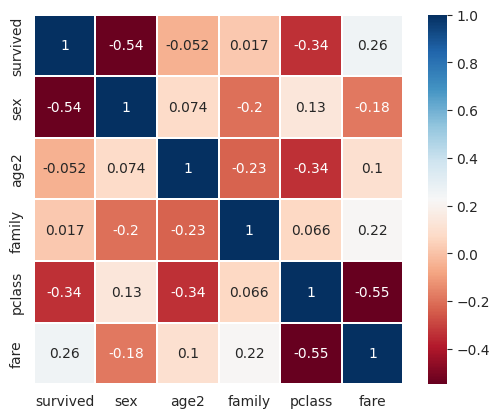

In [122]:
heatmap_data = titanic[['survived', 'sex', 'age2', 'family', 'pclass', 'fare']]
colormap = plt.cm.RdBu
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True,
            annot_kws={'size': 10})
plt.show()

# 실습 과제

# #### 1. titanic_train 데이터로 회귀 분석 모델을 학습하여 titanic_val 데이터의 생존 유무를 예측하기

In [123]:
titanic_train = titanic[['survived', 'sex', 'age2', 'family', 'pclass', 'fare']][:800] # 학습데이터
titanic_val = titanic[['sex', 'age2', 'family', 'pclass', 'fare']][800:] # 검증데이터
titanic_val_survived = titanic['survived'][800:]  # 검증데이터 생존자 정답
Rformula = 'survived ~ sex + age2 + family + pclass + fare'

1번 답안

In [124]:
# 학습 코드 작성
regression_result = ols(Rformula, data=titanic_train).fit()

In [125]:
regression_result.summary()  # 선형 회귀 분석 통계값 출력

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     102.1
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           3.48e-83
Time:                        06:52:48   Log-Likelihood:                -360.24
No. Observations:                 800   AIC:                             732.5
Df Residuals:                     794   BIC:                             760.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2788      0.072     17.790      0.000       1.138       1.420
sex           -0.5256      0.029    -17.993      0.000      -0.583      -0.468
age2          -0.0496      0.011     -4.534      0.000      -0.071      -0.028
family        -0.0322      0.009     -3.468      0.001      -0.050      -0.014
pclass        -0.1665      0.021     -7.912      0.000      -0.208      -0.125
fare           0.0003      0.000      1.027      0.305      -0.000       0.001
==============================================================================
Omnibus:                       36.231   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.096
Skew:                           0.544   Prob(JB):                     1.96e-09
Kurtosis:                       3.137   Cond. No.                         339.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
# 예측 코드 작성
titanic_predict = regression_result.predict(titanic_val)

In [127]:
titanic_predict  # survived 예측값

800    0.243512
801    0.709287
802    0.449133
803    0.192212
804    0.124605
         ...   
886    0.293145
887    1.040691
888    0.559292
889    0.465422
890    0.075235
Length: 91, dtype: float64

In [128]:
titanic_val_survived  # survived 정답

800    0
801    1
802    1
803    1
804    1
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 91, dtype: int64

In [129]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2,family
0,0,3,1,22.0,1,0,7.2500,S,Third,man,1,NaN,Southampton,no,0,2,2
1,1,1,0,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,0,3,2
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,0,NaN,Southampton,yes,1,2,1
3,1,1,0,35.0,1,0,53.1000,S,First,woman,0,C,Southampton,yes,0,3,2
4,0,3,1,35.0,0,0,8.0500,S,Third,man,1,NaN,Southampton,no,1,3,1


#### 2. 타이타닉 탑승자 성별(남성, 여성) 각각 age2 정보를 distplot 하기

<ipython-input-130-76325118d5e3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(male_pclass, kde=True, color='red', label='male pclass')
<ipython-input-130-76325118d5e3>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(female_pclass, kde=True, label='female pclass')


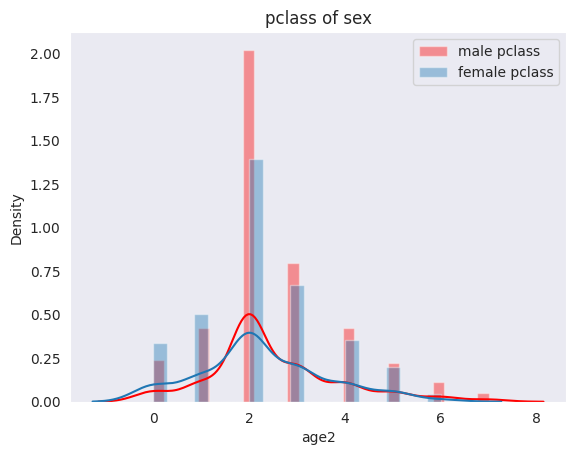

In [130]:
# 코드 작성

male_pclass = titanic.loc[titanic['sex'] == 1, 'age2'] # 남성의 age2 뽑아오기
female_pclass = titanic.loc[titanic['sex'] == 0, 'age2'] # 여성의 age2 뽑아오기

sns.set_style('dark')
sns.distplot(male_pclass, kde=True, color='red', label='male pclass')
sns.distplot(female_pclass, kde=True, label='female pclass')
plt.title('pclass of sex')
plt.legend()
plt.show()

아래의 출력결과가 나오도록 시각화 코드 작성해주세요.

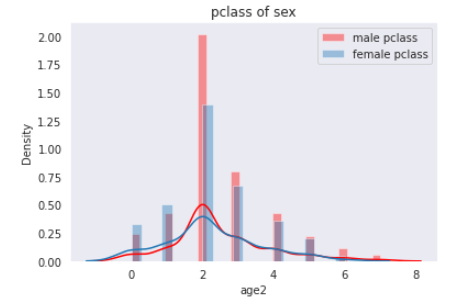